In [ ]:
#  ------------------------------------------------------------------------------------
#  ------------------------------------------------------------------------------------
#
#      ,o888888o.        ,o888888o.       d888888o.   8 888888888o  `8.`8888.      ,8' 
#     8888     `88.   . 8888     `88.   .`8888:' `88. 8 8888    `88. `8.`8888.    ,8'  
#  ,8 8888       `8. ,8 8888       `8b  8.`8888.   Y8 8 8888     `88  `8.`8888.  ,8'   
#  88 8888           88 8888        `8b `8.`8888.     8 8888     ,88   `8.`8888.,8'    
#  88 8888           88 8888         88  `8.`8888.    8 8888.   ,88'    `8.`88888'     
#  88 8888           88 8888         88   `8.`8888.   8 888888888P'      `8. 8888      
#  88 8888           88 8888        ,8P    `8.`8888.  8 8888              `8 8888      
#  `8 8888       .8' `8 8888       ,8P 8b   `8.`8888. 8 8888               8 8888      
#     8888     ,88'   ` 8888     ,88'  `8b.  ;8.`8888 8 8888               8 8888      
#      `8888888P'        `8888888P'     `Y8888P ,88P' 8 8888               8 8888      
#
#  ------------------------------------------------------------------------------------
#  ------------------------------------------------------------------------------------

In [1]:
# --------------------
# import packages 
# --------------------

import h5py
import math
import numpy as np

from numpy import cos, sin, sqrt, exp
from scipy.optimize import curve_fit, leastsq

from cospy.interface import * 
%matplotlib inline  

from IPython.display import display, HTML
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
import matplotlib.pyplot as plot 
from mpl_toolkits.mplot3d import Axes3D

from sympy.interactive import printing
printing.init_printing(use_latex=True)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [21]:
# --------------------
# import h5 data files
# --------------------

file_17 = '/Users/jfuentes/workspace/data17/output.h5'
data_17 = h5py.File(file_17)

file_33 = '/Users/jfuentes/workspace/data33/output.h5'
data_33 = h5py.File(file_33)

file_65 = '/Users/jfuentes/workspace/data65/output.h5'
data_65 = h5py.File(file_65)

file_129 ='/Users/jfuentes/workspace/data129/output.h5'
data_129 = h5py.File(file_129)

current analysis for

$U({\bf x},t) = [A_x \cos(k_x x) + B_x \sin(k_x x)][A_y \cos(k_y y) + B_y \sin(k_y y)][A_z \cos(k_z z) + B_z \sin(k_z z)] \cos(\omega t)$

where
$\vert{\bf k}\vert = k$,
such that
$\omega= \sqrt(k_x^2+k_y^2+k_z^2)$

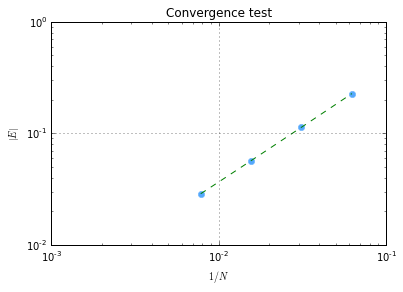

In [69]:
# --------------------

time_step = '2'

# --------------------
# exact solution
# --------------------

def solution(x, y, z, t):
    kx = 1
    ky = 1
    kz = 1
    w  = sqrt(kx*kx + ky*ky + kz*kz)
    
    return cos(kx*z)*cos(ky*y)*cos(kz*x)*cos(w*t)

# --------------------
# data
# --------------------

file_list = list()

file_list.append('/Users/jfuentes/workspace/data17/output.h5')
file_list.append('/Users/jfuentes/workspace/data33/output.h5')
file_list.append('/Users/jfuentes/workspace/data65/output.h5')
file_list.append('/Users/jfuentes/workspace/data129/output.h5')

# --------------------
# computing abs-error
# --------------------

E = list()

for fl in file_list:
    
    h5file = h5py.File(fl)
    
    u = h5file['u/' + time_step]
    t = u.attrs['time']
    
    xx = np.array(h5file['coordinates/x'])
    yy = np.array(h5file['coordinates/y'])
    zz = np.array(h5file['coordinates/z'])
    
    Udiff = np.abs(u - solution(xx, yy, zz, t))
    E.append(np.linalg.norm(Udiff.flatten()))
    h5file.close()
    
# --------------------
# least squares
# --------------------

y = E
x = np.array([1/float(2**n) for n in range(7,3,-1)])

funcLine = lambda tpl, x: tpl[0]*x    + tpl[1]
funcQuad = lambda tpl, x: tpl[0]*x**2 + tpl[1]*x + tpl[2]

func = funcLine
ErrorFunc = lambda tpl, x, y: func(tpl, x) - y
tplInitial1 = (1.0, 2.0) # arbitrary

tplFinal1,success = leastsq(ErrorFunc, tplInitial1[:], args = (x, y))

# --------------------
# linear fit
# --------------------

x1 = np.linspace(x.min(), x.max(), 50)
y1 = func(tplFinal1, x1)

# --------------------
# quadratic fit
# --------------------

func = funcQuad
tplInitial2 = (1.0, 2.0, 3.0) # arbitrary

tplFinal2, success = leastsq(ErrorFunc, tplInitial2[:], args = (x, y))

x2 = x1
y2 = func(tplFinal2, x2)

# --------------------
# maps
# --------------------

fig = plot.figure()
map = fig.add_subplot(111)

map.set_title('Convergence test')
map.set_xlabel('$1/N$')
map.set_ylabel('$|E|$')
map.grid(True)

map.loglog(x , y , 'o' , linewidth=5, markeredgecolor=(0.33,0.66,0.99), markerfacecolor=(0.33,0.66,0.99))
map.loglog(x2, y2, '--', linewidth=1, markeredgecolor=(0.44,0.66,0.88), markerfacecolor=(0.44,0.66,0.88))

plot.show()


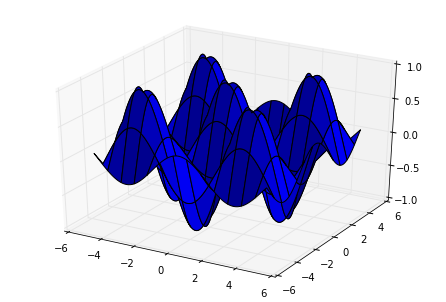

In [93]:
# --------------------
# maps
# --------------------

file_129 ='/Users/jfuentes/workspace/data129/output.h5'
data_129 = h5py.File(file_129)

fig = plot.figure()
fig.clf()
ax  = Axes3D(fig)

xi = 0
yi = 0
zi = 64

U = data_129['u/0'][:,:,zi]

X = data_129['coordinates/x'][:,:,zi]
Y = data_129['coordinates/y'][:,:,zi]

ax.plot_surface(X, Y, U)

In [ ]:
# --------------------
# clear workspace
# --------------------

%reset